In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
%matplotlib inline
import string as st

In [4]:
df = pd.read_csv("C:\\users\\abhijit.a.pande\\machine learning\\datasets\\letterdata.csv")

In [5]:
df.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [37]:
def getAccuracy(actuals, predicted):
    correct = 0
    for i in range(len(actuals)):
        if y_test.iloc[i] == predicted[i]:
            correct += 1
    return (correct/float(len(actuals))) * 100.0

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
ss = StandardScaler()

In [11]:
scaled_df = ss.fit_transform(df.drop("letter", axis = 1))

In [13]:
scaled_df = pd.DataFrame(scaled_df)

In [17]:
scaled_df.columns = df.drop("letter", axis = 1).columns

In [18]:
scaled_df.head()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,-1.057698,0.291877,-1.053277,-0.164704,-1.144013,0.544130,2.365097,-1.714360,0.344994,-0.917071,1.347774,0.034125,-1.305948,-0.219082,-1.438153,0.122911
1,0.510385,1.502358,-1.053277,0.719730,-0.687476,1.531305,-1.075326,0.137561,-0.495072,1.895968,-1.312807,0.514764,-0.448492,-0.219082,0.120081,1.359441
2,-0.012309,1.199738,0.435910,1.161947,1.138672,1.531305,-0.645273,-0.973591,0.344994,0.690380,-1.312807,-0.446513,-0.019764,-0.865626,-0.269477,0.741176
3,1.555774,1.199738,0.435910,0.277513,-0.230939,-0.936631,0.644886,-0.232823,0.344994,-1.720796,-0.932724,0.995402,1.266419,1.074008,-0.659036,0.122911
4,-1.057698,-1.826464,-1.053277,-1.933571,-1.144013,0.544130,-0.645273,0.507945,0.344994,-0.917071,-0.552641,0.514764,-0.877220,-0.865626,0.509640,1.359441


In [21]:
x = scaled_df
y = df["letter"]

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 20)

In [95]:
SVMclassifier = SVC(gamma = 0.2, C = 40)

In [96]:
SVMclassifier.fit(x_train, y_train)

SVC(C=40, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.2, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [97]:
predicted = SVMclassifier.predict(x_test)

In [98]:
getAccuracy(y_test, predicted)

97.575

In [79]:
prletter = ["Pr " + i for i in st.ascii_uppercase[0:26]]

In [82]:
prediction_CM = pd.DataFrame(confusion_matrix(y_test, predicted), index = [i for i in st.ascii_uppercase[0:26]], columns = prletter)

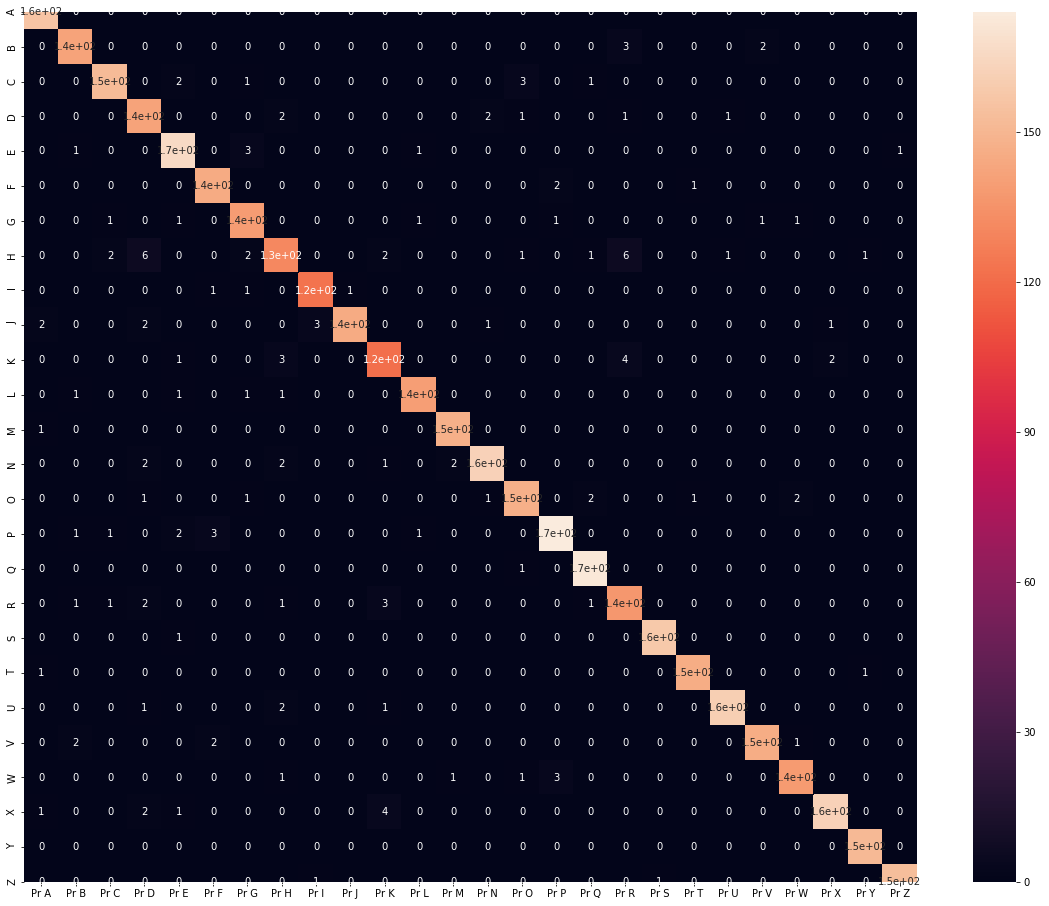

In [86]:
plt.figure(figsize = (20,16))
sb.heatmap(prediction_CM, annot = True)